## Data Analysis

1. Total #videos, #videos by country, 
2. views vs published weekday
3. views vs published hour - separate countries



In [89]:
# Importing modules

import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
from datetime import datetime
import re
import string

from sklearn import datasets, ensemble
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [90]:
# Importing the data file

dataFile = pd.read_csv('modifiedDataForAnalysis.csv')

In [91]:
pd.options.display.max_columns = None    #Displays all columns
dataFile.head()
numVideos = len(dataFile.index)
print(f"Total unique video count: {numVideos}")

# USVideos = dataFile[dataFile.regionTrending == 'US']
# CAVideos = dataFile[dataFile.regionTrending == 'CA']
# GBVideos = dataFile[dataFile.regionTrending == 'GB']

# numVideosUS = len(USVideos.index)
# numVideosCA = len(CAVideos.index)
# numVideosGB = len(GBVideos.index)
# print(f"US Unique video count: {numVideosUS}")
# print(f"CA Unique video count: {numVideosCA}")
# print(f"GB Unique video count: {numVideosGB}")



Total unique video count: 1449


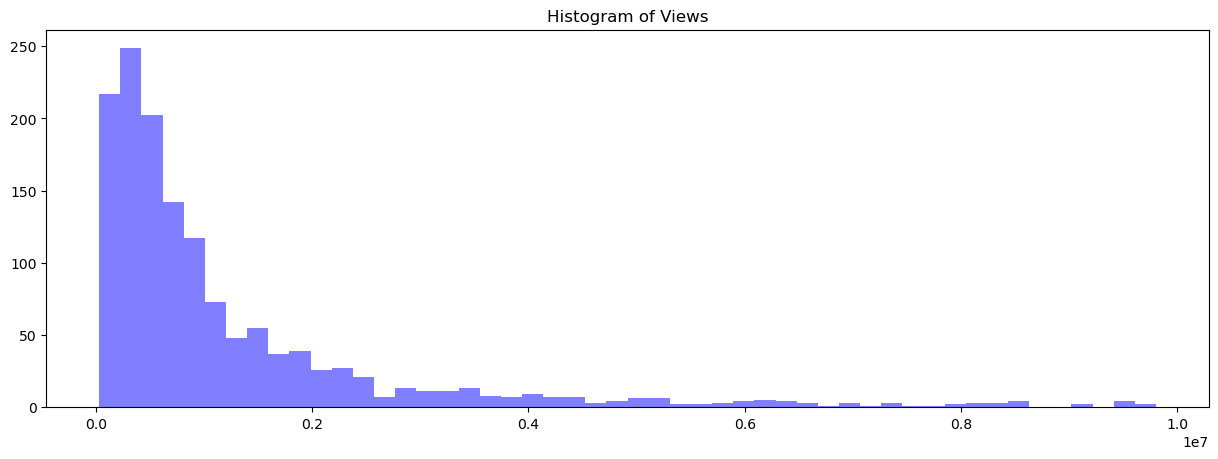

In [92]:
# Plotting histograms - views
# Plotting Views
#Filtering out data with > 1 million views and < 10,000 views
x1 =(dataFile['videoViews']>1000 )
x2 =(dataFile['videoViews']<10e6 )
x3 =(x1 & x2)
dataFilteredViews = dataFile[x3]

# Dropping unnecessary columns
#dataFilteredViews.drop(['videoId', 'timeFetched'], axis=1)


views = dataFilteredViews.videoViews
plt.figure(figsize=(15, 5), dpi= 100)
plt.hist(views, bins=50, alpha=0.5,color='blue')
plt.title('Histogram of Views')
plt.show()


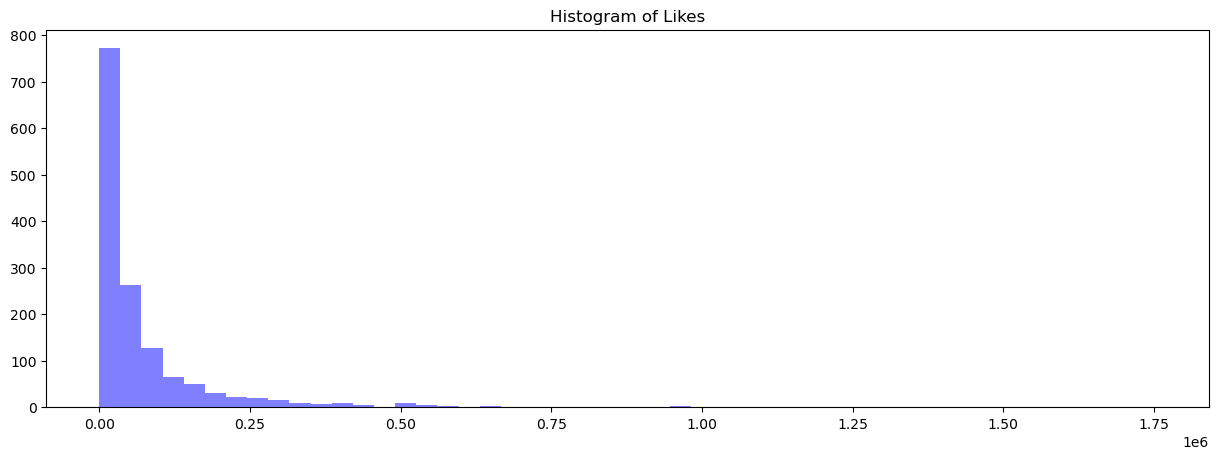

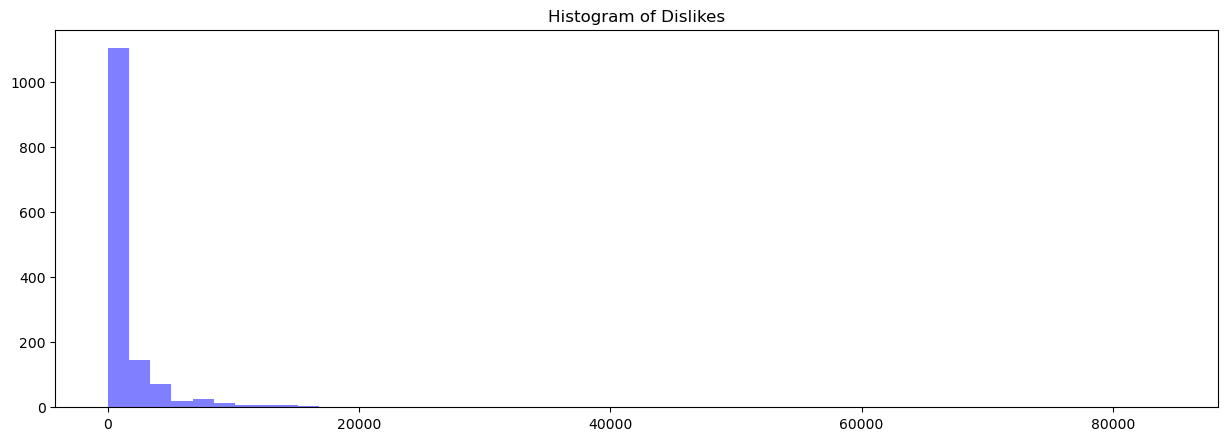

In [93]:
# Plotting histograms - Likes, dislikes, comments
#Plotting Likes
#Using the same filtered data from Views histogram
likes = dataFilteredViews.videoLikes
plt.figure(figsize=(15, 5), dpi= 100)
plt.hist(likes, bins=50, alpha=0.5,color='blue')
plt.title('Histogram of Likes')
plt.show()

# Dislikes
dislikes = dataFilteredViews.videoDislikes
plt.figure(figsize=(15, 5), dpi= 100)
plt.hist(dislikes, bins=50, alpha=0.5,color='blue')
plt.title('Histogram of Dislikes')
plt.show()


In [94]:
dataFilteredViews.head()


,videoTitle,videoCategoryId,videoViews,videoLikes,videoDislikes,videoCommentCount,channelViewCount,channelSubsCount,channelVideoCount,dayDifference,publishedZTimeFloat,publishedDayOfWeek,ageOfChannelDays,videoDurationSeconds,numberOfVideoTags
0,My Experience With The Police,24,2036050,222587,30738,27190,1469323965,6600000,327,5,0.338889,7,3331,636,0
1,Carine - Les histoires bizarres du professeur ...,23,208399,12325,249,1012,228104533,671000,326,7,17.435833,5,3808,702,20
2,Stuntmen React To Bad & Great Hollywood Stunts 15,24,1418033,69609,655,6303,651398039,3930000,795,5,16.656389,7,3401,1044,12
3,12 MIN HAPPY SWEAT WORKOUT - good mood HIIT wo...,17,1418152,35601,422,1354,341240790,3680000,52,6,5.503056,6,2460,728,54
4,Casually Explained: Working From Home,23,1134834,104639,726,3396,261810952,2860000,73,7,18.655000,5,1648,287,14


In [95]:
# Title analysis

vidTitle = dataFilteredViews.videoTitle
#print(vidTitle.shape)
#count = len(re.findall(r'\w+', vidTitle))
#print (count)

# Word count
dataFilteredViews.loc[:,'titleWordCount'] = dataFilteredViews.apply(lambda row: len(re.findall(r'\w+', row.videoTitle)), axis = 1)


# Upper case count
dataFilteredViews.loc[:,'titleUpperCaseCount'] = dataFilteredViews.apply(lambda row: len(re.findall(r'[A-Z]', row.videoTitle)), axis = 1)


# Count of punctuation marks
count = lambda l1,l2: sum([1 for x in l1 if x in l2])
dataFilteredViews.loc[:,'titlePunctuationCount'] = dataFilteredViews.apply(lambda row: count(row.videoTitle,set(string.punctuation)), axis = 1)


#Dropping unnecessary columns
del dataFilteredViews['videoTitle']

dataFilteredViews.head()



C:\Users\vshya\anaconda3\envs\mlEnv\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\vshya\anaconda3\envs\mlEnv\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,videoCategoryId,videoViews,videoLikes,videoDislikes,videoCommentCount,channelViewCount,channelSubsCount,channelVideoCount,dayDifference,publishedZTimeFloat,publishedDayOfWeek,ageOfChannelDays,videoDurationSeconds,numberOfVideoTags,titleWordCount,titleUpperCaseCount,titlePunctuationCount
0,24,2036050,222587,30738,27190,1469323965,6600000,327,5,0.338889,7,3331,636,0,5,5,0
1,23,208399,12325,249,1012,228104533,671000,326,7,17.435833,5,3808,702,20,7,3,1
2,24,1418033,69609,655,6303,651398039,3930000,795,5,16.656389,7,3401,1044,12,8,7,1
3,17,1418152,35601,422,1354,341240790,3680000,52,6,5.503056,6,2460,728,54,14,29,2
4,23,1134834,104639,726,3396,261810952,2860000,73,7,18.655000,5,1648,287,14,5,5,1


In [96]:
# Training an ensemble regression model
# Refer https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html
# Refer https://towardsdatascience.com/youtube-views-predictor-9ec573090acb


X = dataFilteredViews.copy()
y = dataFilteredViews['videoViews']
del X['videoViews']

In [97]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=13)

params = {'n_estimators': 500,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}

In [98]:
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

mse = mean_squared_error(y_test, reg.predict(X_test))
print("The  RMSE on test set: {:.4f}".format(np.sqrt(mse)))

The  RMSE on test set: 612654.5399


['videoCategoryId', 'videoLikes', 'videoDislikes', 'videoCommentCount', 'channelViewCount', 'channelSubsCount', 'channelVideoCount', 'dayDifference', 'publishedZTimeFloat', 'publishedDayOfWeek', 'ageOfChannelDays', 'videoDurationSeconds', 'numberOfVideoTags', 'titleWordCount', 'titleUpperCaseCount', 'titlePunctuationCount']


Text(0.5, 1.0, 'Feature Importance (MDI)')

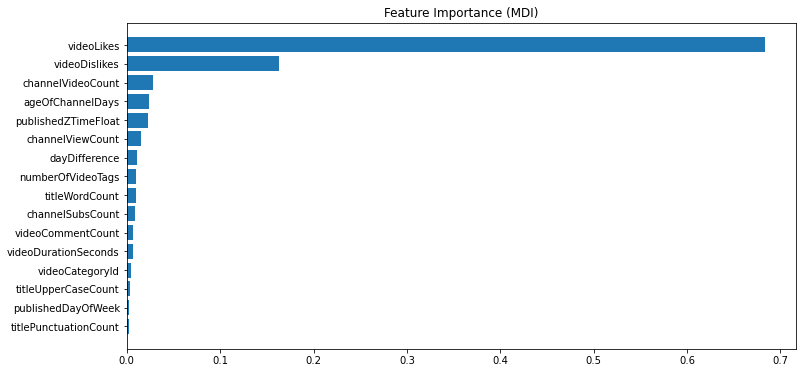

In [99]:
print(list(X_train))
feature_importance = reg.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 1, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(list(X_train))[sorted_idx])
plt.title('Feature Importance (MDI)')

The  RMSE on test set: 1134996.3410
['videoCategoryId', 'channelViewCount', 'channelSubsCount', 'channelVideoCount', 'dayDifference', 'publishedZTimeFloat', 'publishedDayOfWeek', 'ageOfChannelDays', 'videoDurationSeconds', 'numberOfVideoTags', 'titleWordCount', 'titleUpperCaseCount', 'titlePunctuationCount']


Text(0.5, 1.0, 'Feature Importance (MDI)')

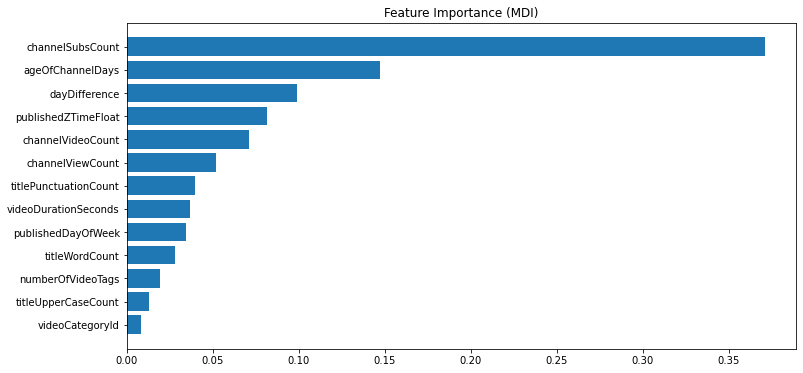

In [100]:
# Repeating after removing likes, comments, and dislikes

del X['videoLikes']
del X['videoDislikes']
del X['videoCommentCount']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=13)

params = {'n_estimators': 500,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}

reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

mse = mean_squared_error(y_test, reg.predict(X_test))
print("The  RMSE on test set: {:.4f}".format(np.sqrt(mse)))

print(list(X_train))
feature_importance = reg.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 1, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(list(X_train))[sorted_idx])
plt.title('Feature Importance (MDI)')